<br>
<br>
<br>
<br>
<br>

<div style="text-align:center">
<font size="12em" color="#214A96" face="Krungthep">
<strong> Prediction of<br><br>Flights Delay </strong>
<br><br><br><br>
<font size="6em" color="#214A96" face="Krungthep">
    <strong>Team <font color="blue">O</font><font color="red">U</font><font color="#D7DF01">T</font><font color="0174DF">L</font><font color="green">I</font><font color="red">E</font><font color="5882FA">R</font></strong>
<br>
<div style="text-align:center">
<font size="3em" color="black" face="Chalkduster">
<br>Minjae Ahn <br>
Eunkyu Park<br>
Seungmoo Yang<br>
Seunghwan Roh
</font>
<br><br><br><br><br>


<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 0. Intro </strong><br><br><br><br><br>

<font size="6" face="Futura">
<strong>0-1 Contents</strong>

    # 0. Intro
    # 1. Problem Definition & Results
    # 2. About Datasets
    # 3. Data Cleaning & EDA
    # 4. Regression 
    # 5. Conclusion & Reflection

<font size="6" face="Futura">
<strong>0-2 Setting</strong>    

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import math
import warnings
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
warnings.filterwarnings('ignore')

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 1. Problem Definition & Results </strong><br><br><br><br><br>


<font size="6" face="Futura">
<strong>1-1 Problem Definition</strong>

![변수설명](https://www.scylladb.com/wp-content/uploads/flight-delay.jpg)

- 항공 산업에서 항공편 지연은 매우 중요한 이슈
- 독일의 컨설팅 회사 'Aviation Experts'에 따르면 2014년 한 해에만 항공편 지연으로 인해 250억 달러의 비용이 발생
- 미국에서는 항공편 지연에 따른 간접적 영향으로 인해 GDP가 40억 달러 감소했다는 연구 결과도 있음
- 미국 내 항공편의 도착 지연 시간을 예측모델을 만들어보기로 결정

<br><font size="6" face="Futura">
<strong>1-2 Result</strong>

![result_test](./result.png)

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 2. About Datasets </strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>2-1 Loading Datasets</strong>

In [28]:
data_flights = pd.read_csv('./flights.csv')
data_airlines = pd.read_csv('./airlines.csv')
data_airports = pd.read_csv('./airports.csv')


<br><font size="6" face="Futura">
<strong>2-2 Columns</strong> _flights.csv_

![변수 설명](./variable.png)

| 변수 | 의미 | 예시 |
| --- | --- | --- |
| **YEAR, MONTH, DAY, DAY_OF_WEEK** | 날짜와 요일 | 2015, 3, 7, 6 |
| **AIRLINE** | 항공사를 나타내는 IATA 코드 | UA |
| FLIGHT_NUMBER | 항공 노선 | 1296 |
| TAIL_NUMBER | 비행기 기체 식별번호 | N73860 |
| ORIGIN_AIRPORT, DESTINATION_AIRPORT | 출발공항, 도착공항의 IATA 코드 | LAX, KOA |
| SCHEDULED_DEPARTURE | 비행기의 출발 예정 시각 | 917 |
| DEPARTURE_TIME | 실제 비행기의 출발 시각 | 915 |
| **DEPARTURE_DELAY** | 출발시 Delay 된 시간 | -2 |
| **TAXI_OUT** | 터미널에서 이륙 시점까지 걸린 시간 | 17 |
| WHEELS_OFF | 비행기가 활주로에서 뜬 시각 | 932 |
| SCHEDULED_TIME | 예정 소요시간 | 352 |
| ELAPSED_TIME | 실제 소요시간 | 369 |
| **AIR_TIME** | 체공 시간 | 346 |
| **DISTANCE** | 출발지에서 도착지까지의 거리(마일) | 2504 |
| WHEELS_ON | 비행기가 활주로에 내린 시각 | 1318 |
| **TAXI_IN** | 착륙 시점부터 터미널까지 걸린 시간 | 6 |
| SCHEDULED_ARRIVAL | 비행기의 도착 예정 시각 | 1309 |
| ARRIVAL_TIME | 실제 비행기의 도착 시각 | 1324 |
| **ARRIVAL_DELAY** | 도착시 Delay 된 시간 | 15 |
| DIVERTED | 목적지 변경 | 0 |
| CANCELLED | 항공편 취소 여부 | 0 |
| CANCELLATION_REASON | 취소 이유 | NaN |
| **AIR_SYSTEM_DELAY** | 시스템 문제로 인한 딜레이 시간 | 15 |
| **SECURITY_DELAY** | 보안 문제로 인한 딜레이 시간 | 0 |
| **AIRLINE_DELAY** | 항공사 문제로 인한 딜레이 시간 | 0 |
| **LATE_AIRCRAFT_DELAY** | 항공기 지각으로 딜레이된 시간 | 0 |
| **WEATHER_DELAY** | 날씨로 인한 딜레이 시간 | 0 

In [3]:
# data_flights.csv의 데이터 예시입니다.
data_flights.iloc[1000000]

YEAR                     2015
MONTH                       3
DAY                         7
DAY_OF_WEEK                 6
AIRLINE                    UA
FLIGHT_NUMBER            1296
TAIL_NUMBER            N73860
ORIGIN_AIRPORT            LAX
DESTINATION_AIRPORT       KOA
SCHEDULED_DEPARTURE       917
DEPARTURE_TIME            915
DEPARTURE_DELAY            -2
TAXI_OUT                   17
WHEELS_OFF                932
SCHEDULED_TIME            352
ELAPSED_TIME              369
AIR_TIME                  346
DISTANCE                 2504
WHEELS_ON                1318
TAXI_IN                     6
SCHEDULED_ARRIVAL        1309
ARRIVAL_TIME             1324
ARRIVAL_DELAY              15
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON       NaN
AIR_SYSTEM_DELAY           15
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
Name: 1000000, dtype: object

<br><font size="6" face="Futura">
<strong>2-3 Columns</strong> _airlines.csv_

In [4]:
# airlines.csv의 데이터 전체입니다. 
print(data_airlines)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


<br><font size="6" face="Futura">
<strong>2-4 Columns </strong> _airports.csv_

| <center>변수</center> | <center>설명</center> | <center>예시</center> |
| --- | --- | --- |
| <center>**IATA_CODE**</center> | <center>공항의 IATA 코드</center> | <center>ABQ</center> |
| <center>AIRPORT</center> | <center>공항명</center> | <center>Albuquerque International Sunport</center> |
| <center>**CITY**</center> | <center>도시</center> | <center>Albuquerque</center> |
| <center>STATE</center> | <center>주</center> | <center>NM</center> |
| <center>COUNTRY</center> | <center>국가</center> | <center>USA</center> |
| <center>**LATITUDE**</center> | <center>위도</center> | <center>35.04022</center> |
| <center>**LONGITUDE**</center> | <center>경도</center> | <center>-106.60919</center> |

In [5]:
# airport.csv의 데이터 예시입니다.
data_airports.iloc[2]

IATA_CODE                                  ABQ
AIRPORT      Albuquerque International Sunport
CITY                               Albuquerque
STATE                                       NM
COUNTRY                                    USA
LATITUDE                               35.0402
LONGITUDE                             -106.609
Name: 2, dtype: object


<br><font size="6" face="Futura">
<strong>2-5 Train & Test Data Split</strong><br></font>
<br><br><br>

<div style="text-align:center"><i><strong>TRAIN | TEST</strong></i></div>
    


In [25]:
# data_flights를 train_set과 test_set으로 나눠줍니다. 
# test_set 비율을 argument로 줍니다. 
train_set, test_set = train_test_split(data_flights, 
                                       test_size = 0.15, 
                                       random_state = 20181108)

# indexing을 다시 정렬합니다.
train_set.sort_index(inplace=True)
test_set.sort_index(inplace=True)
train_set.reset_index(inplace=True, drop=True)
test_set.reset_index(inplace=True, drop=True)

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong>3.Data Cleaning & EDA</strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>3-1 Data Cleaning</strong> _Missing Data_

In [7]:
# Shape와 NaN값을 확인합니다.
print("train_set의 shape:", train_set.shape, end="\n\n")
print("train_set의 각 컬럼별 NaN값의 수:\n", train_set.isnull().sum())

train_set의 shape: (4946217, 31)

train_set의 각 컬럼별 NaN값의 수:
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              12486
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           73205
DEPARTURE_DELAY          73205
TAXI_OUT                 75617
WHEELS_OFF               75617
SCHEDULED_TIME               5
ELAPSED_TIME             89192
AIR_TIME                 89192
DISTANCE                     0
WHEELS_ON                78551
TAXI_IN                  78551
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             78551
ARRIVAL_DELAY            89192
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    4869909
AIR_SYSTEM_DELAY       4042357
SECURITY_DELAY         4042357
AIRLINE_DELAY          4042357
LATE_AIRCRAFT_DELAY    4042357
WEATHER_DE

- 항공편 취소와 목적지 변경은 딜레이와 무관하므로 다음 변수는 자료에서 배제합니다.<br>
`DIVERTED`<br>
`CANCELLED`<br>
`CANCELLATION_REASON`



In [8]:
train_set = train_set[((train_set['DIVERTED']==0) & (train_set['CANCELLED'] == 0))]
train_set = train_set.fillna(0)
train_set = train_set[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL
                       'ARRIVAL_TIME',
       'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [9]:
# Shape와 NaN값을 다시 확인합니다.
print("df의 shape:", train_set.shape, end="\n\n")
print("df의 각 컬럼별 NaN값의 수:\n", train_set.isnull().sum())

df의 shape: (4857025, 28)

df의 각 컬럼별 NaN값의 수:
 YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


<br><font size="6" face="Futura">
<strong>3-2 Data Cleaning</strong> _Airports_

- df 데이터셋의 공항 컬럼에는 IATA(International Air Transport Association) 코드를 부여받지 못한 공항들이 포함되어 있습니다.
- airports 데이터셋에서 확인할 수 없는 공항에서 뜨고 내린 항공 자료는 제외합니다.
- 데이터셋에서 `ORIGIN_AIRPORT` (출발공항), `DESTINATION_AIRPORT` (도착공항)의 수는 `928`개 입니다.

In [10]:
# df 데이터셋에 등장하는 공항의 수
print("train_set의 출발공항 수는 : {}"\
      .format(len(train_set["ORIGIN_AIRPORT"].unique())))
print("train_set의 도착공항 수는 : {}"\
      .format(len(train_set["DESTINATION_AIRPORT"].unique())))

train_set의 출발공항 수는 : 928
train_set의 도착공항 수는 : 926


In [11]:
# airports 데이터셋에 등장하는 공항의 수
print("우리가 알고있는 미국내 공항 정보의 수 : {}"\
      .format(len(data_airports['IATA_CODE'].unique())))

우리가 알고있는 미국내 공항 정보의 수 : 322


In [12]:
# IATA 등록 공항들 리스트로 뽑기
US_AIRPORTS = data_airports['IATA_CODE'].unique()
print("미국 내 공항의 수: {}".format(len(US_AIRPORTS)))

# ORIGIN_AIRPORT중 US_AIRPORTS 리스트에 있는 값들만 남기기
train_set = train_set[train_set['ORIGIN_AIRPORT'].isin(US_AIRPORTS) & \
        train_set['DESTINATION_AIRPORT'].isin(US_AIRPORTS)].reset_index()


미국 내 공항의 수: 322


<br><font size="6" face="Futura">
<strong>3-3 EDA</strong> FROM_HOLIDAY  IS_HOLIDAY

- YEAR 와 MONTH, DAY 를 한 `DATE` 컬럼으로 합칩니다.

In [13]:
train_set['DATE'] = pd.to_datetime(train_set[['YEAR', 'MONTH', 'DAY']], format='%y/%m/%d')


- FROM_HOLIDAY : 가장 가까운 공휴일에서 떨어진 일 수

In [14]:
holidays = [(1, 1), (1, 19), (2, 16), (5, 25), (7, 3), (9, 9), (11, 11), (11, 26), (12, 25)]

def from_holiday(input_date):
    """
    10개의 기념일에서 몇일 떨어져 있는지 를 계산 한후, 가장 가까운 기념일과의 차이를 구하는 함수입니다. 
    parameter: type: datetime.date - 변환하고자 하는 날짜를 datetime.date형식으로 넣어줍니다.
    return : type: int
    """
    # difference[holiday] = date - holiday 형식으로 dict에 정리
    difference = {}
    
    for holiday in holidays:
        diff = input_date - datetime.date(2015, holiday[0], holiday[1])
        # 차이가 음수값이 나올 수 있으니 절댓값으로 저장
        difference[holiday] = abs(diff.days)
        
    # value값들 중 minimum 을 리턴하기. 
    return min(difference.values())

In [15]:
train_set['FROM_HOLIDAY'] = train_set['DATE'].dt.date.apply(lambda date : from_holiday(date))


- IS_HOLIDAY : 공휴일, 토요일, 일요일 인 경우 1

In [16]:
def is_holiday(from_holiday, day_of_week):
    if (from_holiday == 0) | (day_of_week == 6) | (day_of_week == 7):
        return 1
    else:
        return -1

In [17]:
train_set['IS_HOLIDAY'] = train_set.apply(lambda df:is_holiday(df['FROM_HOLIDAY'], df['DAY_OF_WEEK']), axis=1)

<br><font size="6" face="Futura">
<strong>3-4 EDA</strong> _DIRECTION_

- 출발공항과 도착공항 경도 파악

In [21]:
# AIRPORTS LAT, LONG FROM AIRPORTS.CSV
origin_lat_long = data_airports[['IATA_CODE', 'LONGITUDE']]
origin_lat_long = origin_lat_long.rename(columns={'IATA_CODE' : "ORIGIN_AIRPORT", "LONGITUDE" : "ORIGIN_LONGITUDE"})
train_set = pd.merge(train_set, origin_lat_long, how="left")
train_set.tail()

destination_lat_long = origin_lat_long.rename(columns={'ORIGIN_AIRPORT' : "DESTINATION_AIRPORT", "ORIGIN_LONGITUDE" : "DESTINATION_LONGITUDE"})
destination_lat_long.head()
train_set = pd.merge(train_set, destination_lat_long, how="left")
train_set.head()

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,FROM_HOLIDAY,IS_HOLIDAY,ORIGIN_LONGITUDE,DESTINATION_LONGITUDE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1,-149.99619,-122.30931
1,1,2015,1,1,4,US,840,N171US,SFO,CLT,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1,-122.37484,-80.94313
2,2,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1,-118.40807,-80.29056
3,3,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1,-122.30931,-149.99619
4,4,2015,1,1,4,DL,806,N3730B,SFO,MSP,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1,-122.37484,-93.21692


In [60]:
train_set[['ORIGIN_LONGITUDE','DESTINATION_LONGITUDE']].head()

,ORIGIN_LONGITUDE,DESTINATION_LONGITUDE
0,-149.99619,-122.30931
1,-122.37484,-80.94313
2,-118.40807,-80.29056
3,-122.30931,-149.99619
4,-122.37484,-93.21692


- 비행기의 비행 방향 설정
- 동쪽 : 1, 서쪽 : -1

In [22]:
def define_direction(origin_long, destination_long):
    if origin_long < destination_long:
        #동쪽으로 비행
        return 1
    else:
        #서쪽으로 비행
        return -1

In [24]:
train_set['DIRECTION'] = train_set.apply(lambda df: define_direction(df['ORIGIN_LONGITUDE'], df['DESTINATION_LONGITUDE']), axis=1)

In [64]:
train_set[['SCHEDULED_DEPARTURE','DIRECTION']].head()

,SCHEDULED_DEPARTURE,DIRECTION
0,00:05:00,1
1,00:20:00,1
2,00:20:00,1
3,00:25:00,-1
4,00:25:00,1


<br><font size="6" face="Futura">
<strong>3-5 EDA</strong> _COUNT_

- COUNT : 일정 시간 동안 출발 공항에서 함께 대기하고 있는 비행기의 수

In [27]:
def converting_timeformat(data):
    """
    data 상에 시각 표현을 00:00:00 형태로 변경하는 함수입니다.
    parameter : dataframe 내의 시간 형식을 바꾸고 싶은 column 의 element 를 의미합니다.
    return : 00:00:00 형식에 맞는 datetime.time 자료형이 return 됩니다.
    """
    if np.isnan(data):
        new_time_format = np.nan
    else:
        padding = "{:04d}".format(int(data))
        if padding == "2400":
            padding = "0000"
        new_time_format = datetime.time(int(padding[0:2]), int(padding[2:4]))
    
    return new_time_format

In [28]:
train_set['SCHEDULED_DEPARTURE'] = train_set['SCHEDULED_DEPARTURE'].apply(converting_timeformat)
train_set['SCHEDULED_ARRIVAL'] = train_set['SCHEDULED_ARRIVAL'].apply(converting_timeformat)

In [29]:
def bind_date_time(date, time):
    """ㅇ
    날짜와 시각을 합쳐 epoch 형식으로 합쳐주는 함수입니다. 
    YYYY-MM-DD HH:MM:SS 형식의 datetime으로 합쳐줍니다.
    
    parameter : date(type : datetime.datetime), time(type : datetime.time)
    return : datetime.datetime - YYYY-MM-DD HH:MM:SS 
    """
    if pd.isnull(date) or pd.isnull(time):
        return np.nan
    return datetime.datetime.combine(date, time)

In [30]:
train_set['SCHEDULED_DEPARTURE_DATETIME'] = train_set.apply(lambda df:bind_date_time(df['DATE'], df['SCHEDULED_DEPARTURE']), axis=1)

In [31]:
train_set['SCHEDULED_ARRIVAL_DATETIME'] = train_set.apply(lambda df:bind_date_time(df['DATE'], df['SCHEDULED_DEPARTURE']), axis=1)

- Date_time to EPOCH TiME

In [32]:
def epoch_time(data):
    """
    OLS 를 돌리기위해 날짜,시각 data 를 epoch time 으로 변환합니다.
    parameter : 시각 data
    return : epoch time 의 timestamp
    """
    return data.timestamp()

In [33]:
train_set["SCHEDULED_DEPARTURE_DATETIME_EPOCH"] = train_set["SCHEDULED_DEPARTURE_DATETIME"].apply(epoch_time)

- COUNT 를 실제로 만드는 변수
- 매우매우 오래걸리므로, 돌리지 마십시오.

In [ ]:
# def count_flights(df, scheduled_departure):
#     idx_standard = df[df['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] == scheduled_departure].index.values.astype(int)[0]

#     temp_indx = idx_standard
#     flights_after_count = 0
#     flights_before_count = 0
#     if temp_indx == 0:
#         flights_after_count += 1
#         while temp_indx <= df.shape[0]:
            
#             if df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] <= scheduled_departure + 600:
#                 flights_after_count += 1
#                 temp_indx += 1

#             else:
#                 break

#     else:
#         temp_indx = idx_standard
#         while temp_indx < df.shape[0]:
#             if df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH'] <= scheduled_departure + 600:
#                 flights_after_count += 1
#                 temp_indx += 1

#             else:
#                 break

#         temp_indx = idx_standard
#         while temp_indx >= 0:
#             if scheduled_departure - 600 <= df.iloc[temp_indx]['SCHEDULED_DEPARTURE_DATETIME_EPOCH']:
#                 flights_before_count += 1
#                 temp_indx -= 1

#             else:
#                 break
                

#     return flights_before_count + flights_after_count - 1

In [ ]:
dflist_flights_by_airport = []
for airport in airports_list:
    dflist_flights_by_airport.append(train_set[(train_set['ORIGIN_AIRPORT'] == airport)].reset_index())

In [ ]:
for df in dflist_flights_by_airport:
    df['COUNT'] = df['SCHEDULED_DEPARTURE_DATETIME_EPOCH'].apply(lambda epoch_time: count_flights(df, epoch_time))

<br><font size="6" face="Futura">
<strong>3-6 EDA</strong> _RATIO_

- 항공사 별, 기체 한대가 담당하는 노선 수

In [18]:
AIRLINE_tail_number ={
    'AS': 147, 
    'US': 351, 
    'AA': 1044, 
    'DL': 825, 
    'NK': 79, 
    'UA': 721, 
    'HA': 50, 
    'B6': 215,
    'OO': 383, 
    'EV': 390, 
    'F9': 62,
    'WN': 704, 
    'MQ': 202, 
    'VX': 57,
}

AIRLINE_flight_number ={
    'AS': 744, 
    'US': 958, 
    'AA': 2437, 
    'DL': 2445, 
    'NK': 451, 
    'UA': 1577, 
    'HA': 310, 
    'B6': 1149,
    'OO': 2036, 
    'EV': 2364, 
    'F9': 807,
    'WN': 6642, 
    'MQ': 939, 
    'VX': 317,
}

AIRLINE_tail_number
percentage = {}
for key, value in AIRLINE_tail_number.items():
    percentage[key] = AIRLINE_flight_number[key] / value

dfx = pd.DataFrame(list(percentage.keys())).rename(columns={0 : "AIRLINE"})
dfy = pd.DataFrame(list(percentage.values())).rename(columns={0 : "RATIO"})    
df_percentage = pd.concat([dfx,dfy], axis=1)
df_percentage

,AIRLINE,RATIO
0,AS,5.061224
1,US,2.729345
2,AA,2.334291
3,DL,2.963636
4,NK,5.708861
5,UA,2.187240
6,HA,6.200000
7,B6,5.344186
8,OO,5.315927
9,EV,6.061538


In [26]:
df = train_set.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean().reset_index()
new = pd.merge(df, df_percentage, how="left")

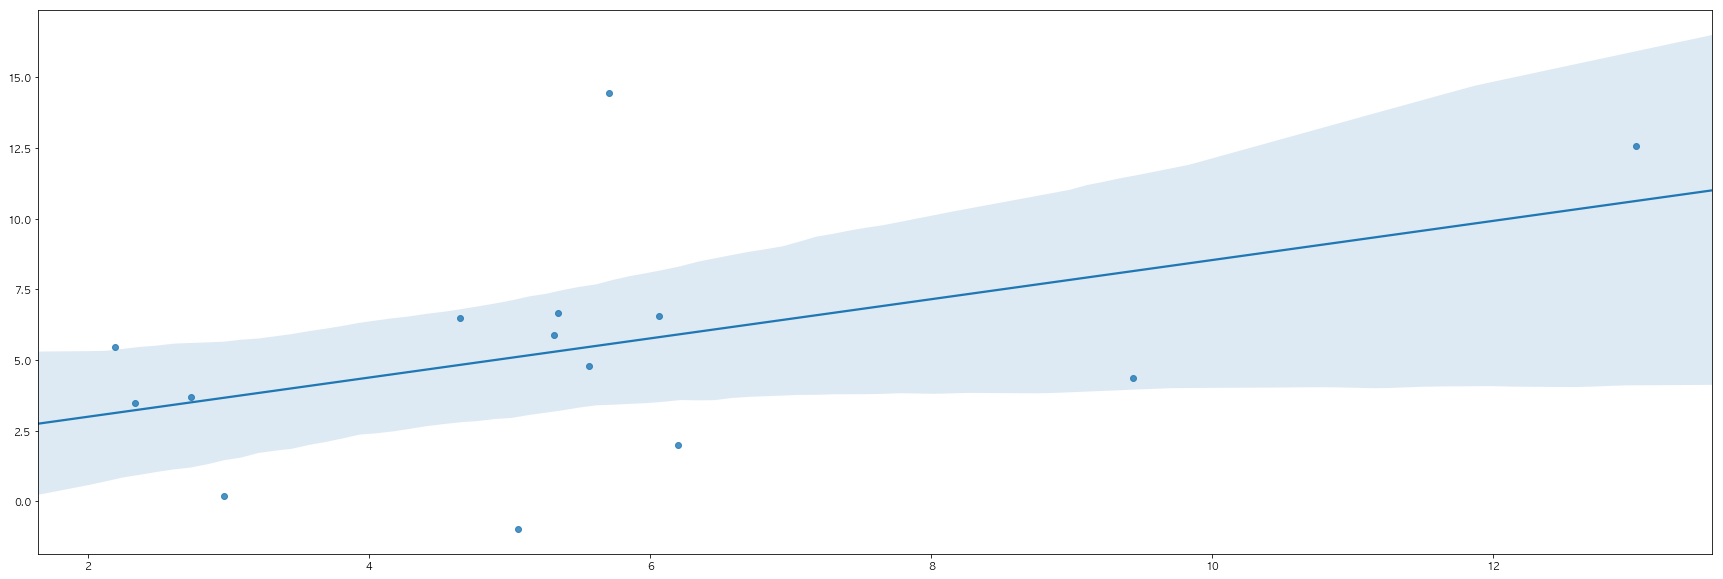

In [27]:
plt.figure(figsize=(30,10))
dfx = new['RATIO'].values
dfy = new['ARRIVAL_DELAY'].values

sns.regplot(dfx, dfy)
plt.show()

In [37]:
ratio_merged = pd.merge(train_set, df_percentage, how="left")

<br><font size="6" face="Futura">
<strong>3-7 EDA</strong> _Correlation_

In [43]:
# 식별번호, 시각 등의 변수는 제외하고 상관관계를 파악합니다.
train_set_float = train_set[['DEPARTURE_DELAY', 
              'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
              'AIR_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_DELAY',
              'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
              'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
train_set_float.corr()

,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
DEPARTURE_DELAY,1.000000,0.059210,0.027363,0.030597,0.023053,0.023621,0.013316,0.945113,0.094943,0.013322,0.614810,0.559776,0.245406
TAXI_OUT,0.059210,1.000000,0.112988,0.206851,0.088185,0.072613,0.003974,0.228100,0.364356,-0.005939,-0.069306,-0.128084,0.064920
SCHEDULED_TIME,0.027363,0.112988,1.000000,0.985039,0.990656,0.984166,0.097318,-0.029008,0.030940,0.005727,0.032863,-0.044624,-0.001882
ELAPSED_TIME,0.030597,0.206851,0.985039,1.000000,0.989853,0.973213,0.155107,0.030369,0.152649,0.003213,-0.001571,-0.091977,0.006516
AIR_TIME,0.023053,0.088185,0.990656,0.989853,1.000000,0.985355,0.080490,-0.006342,0.056451,0.005265,0.018344,-0.063629,-0.005936
DISTANCE,0.023621,0.072613,0.984166,0.973213,0.985355,1.000000,0.073812,-0.024611,0.015015,0.006165,0.032132,-0.044480,-0.009318
TAXI_IN,0.013316,0.003974,0.097318,0.155107,0.080490,0.073812,1.000000,0.117948,0.247068,-0.005968,-0.050445,-0.055569,-0.002035
ARRIVAL_DELAY,0.945113,0.228100,-0.029008,0.030369,-0.006342,-0.024611,0.117948,1.000000,0.247565,0.011090,0.602654,0.526830,0.266824
AIR_SYSTEM_DELAY,0.094943,0.364356,0.030940,0.152649,0.056451,0.015015,0.247068,0.247565,1.000000,-0.010699,-0.120096,-0.146123,-0.001087
SECURITY_DELAY,0.013322,-0.005939,0.005727,0.003213,0.005265,0.006165,-0.005968,0.011090,-0.010699,1.000000,-0.012866,-0.011923,-0.004798


/Users/emjayahn/.pyenv/versions/3.7.0/envs/dss/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


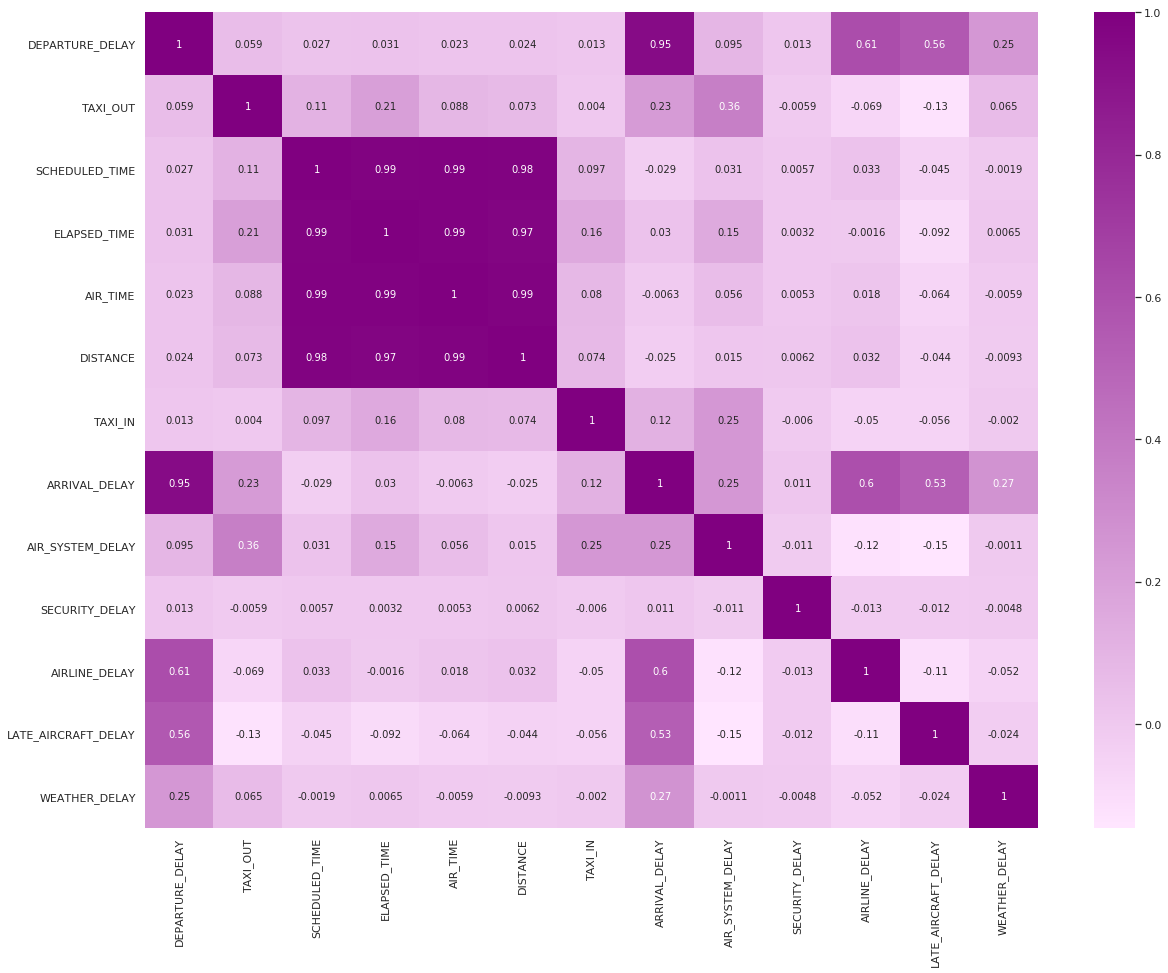

In [47]:
cmap = sns.light_palette("purple", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(train_set_float.corr(), annot=True, cmap=cmap)
plt.show()

In [49]:
train_set_category = train_set[['MONTH', 'DAY', 'DAY_OF_WEEK', \
                                'ARRIVAL_DELAY', 'FROM_HOLIDAY']]
train_set_category.corr(method='spearman')

,MONTH,DAY,DAY_OF_WEEK,ARRIVAL_DELAY,FROM_HOLIDAY
MONTH,1.000000,0.005065,-0.015221,-0.051312,-0.179538
DAY,0.005065,1.000000,0.004973,-0.008299,-0.009040
DAY_OF_WEEK,-0.015221,0.004973,1.000000,-0.023763,0.000085
ARRIVAL_DELAY,-0.051312,-0.008299,-0.023763,1.000000,-0.008205
FROM_HOLIDAY,-0.179538,-0.009040,0.000085,-0.008205,1.000000


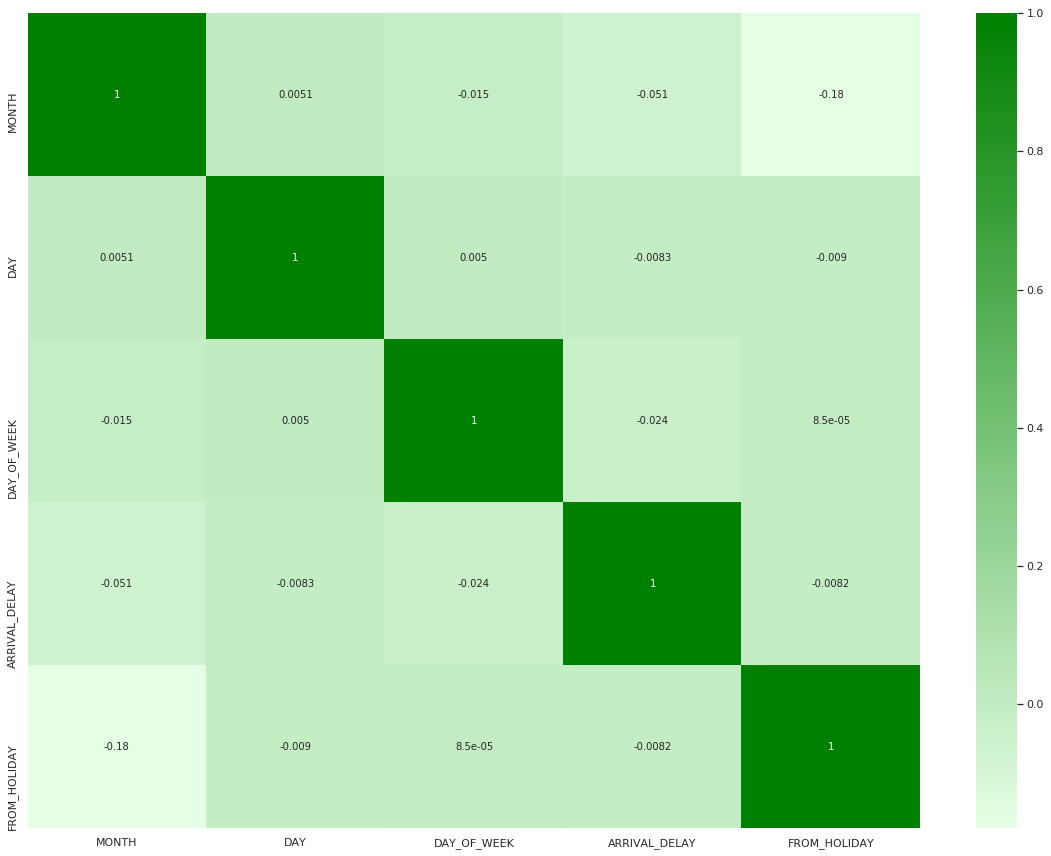

In [50]:
cmap = sns.light_palette("green", as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(train_set_category.corr(method='spearman'), annot=True, cmap=cmap)
plt.show()

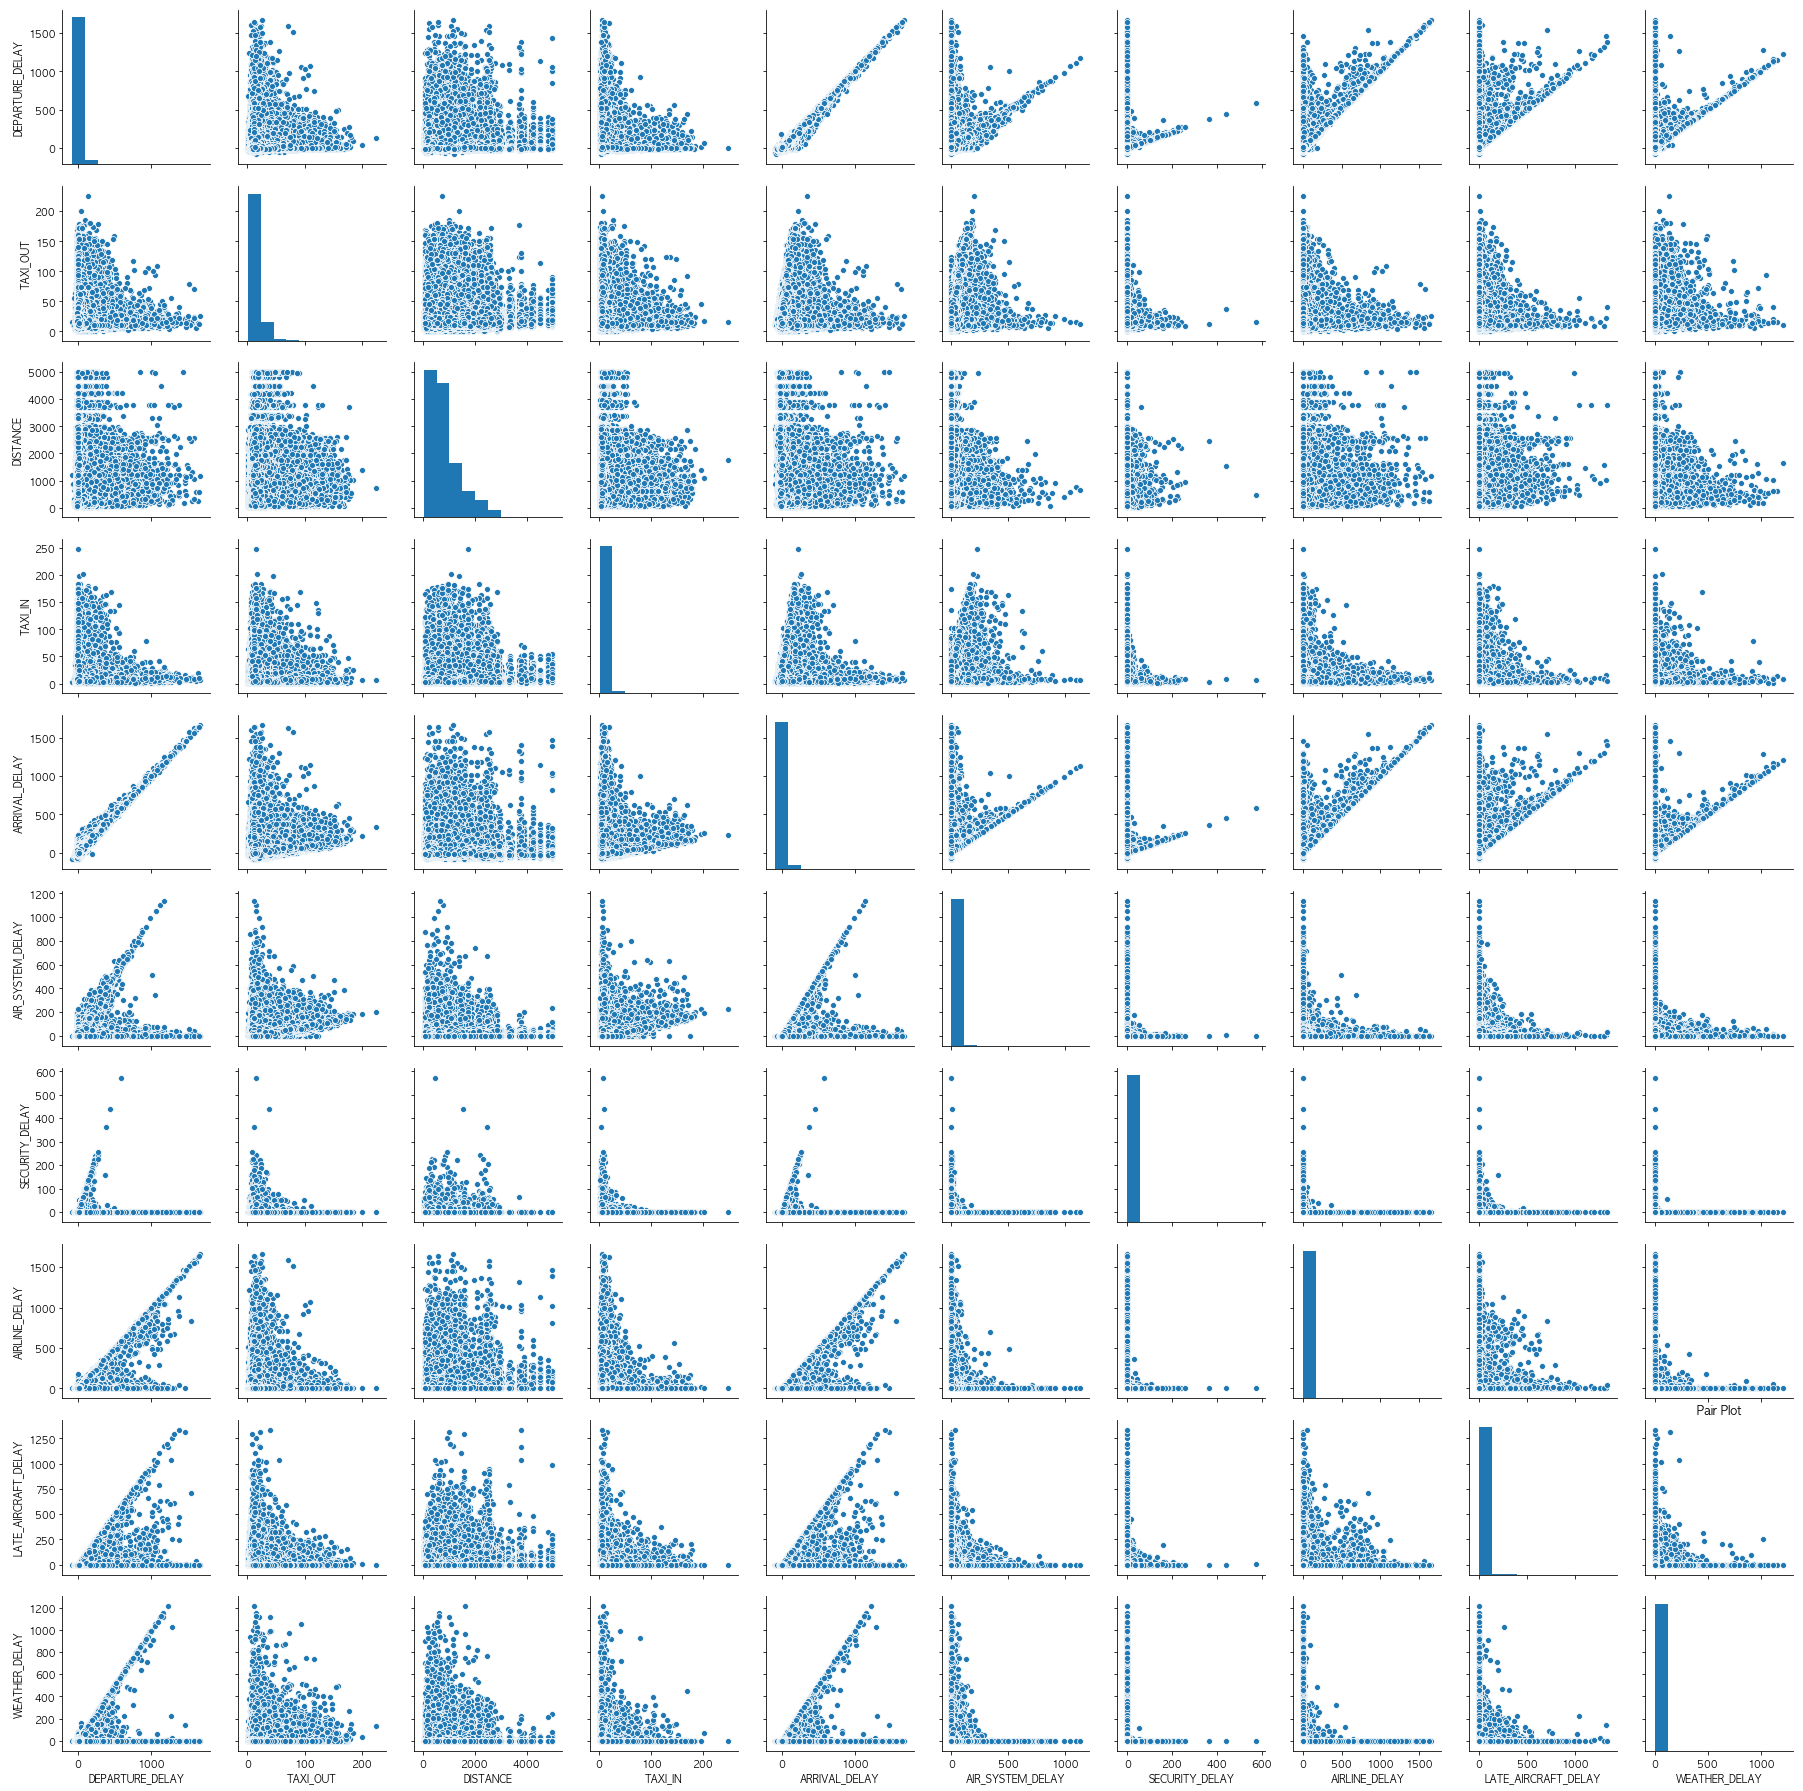

In [48]:
## 오래걸림 주의. 눈으로만 보세요
# sns.pairplot(dfxx)
# plt.title("Pair Plot")
# plt.show()

<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 4.OLS Regression </strong><br><br><br><br><br>

<br><font size="6" face="Futura">
<strong>4-1 OLS Regression</strong> _MODEL_

In [55]:
model = sm.OLS.from_formula("ARRIVAL_DELAY ~ scale(DEPARTURE_DELAY) + scale(AIR_SYSTEM_DELAY) + scale(AIRLINE_DELAY) +\
scale(LATE_AIRCRAFT_DELAY) + scale(WEATHER_DELAY)", data=train_set)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.439e+07
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:55:59   Log-Likelihood:            -1.6360e+07
No. Observations:             4446356   AIC:                         3.272e+07
Df Residuals:                 4446350   BIC:                         3.272e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<br><font size="5" face="Futura">
<strong>4-1-1 K-FOLD 교차검증 </strong>

In [69]:
rscores = np.zeros(5)
mean_scores = np.zeros(5)
median_scores = np.zeros(5)


In [70]:
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train_set)):
    df_train = train_set.iloc[idx_train]
    df_test = train_set.iloc[idx_test]

    pred = result.predict(df_test)
    rsquared = r2_score(df_test['ARRIVAL_DELAY'], pred)
    mean_squared = mean_squared_error(df_test['ARRIVAL_DELAY'], pred)
    median_error = median_absolute_error(df_test['ARRIVAL_DELAY'], pred)
    
    rscores[i] = rsquared
    mean_scores[i] = mean_squared
    median_scores[i] = median_error

In [71]:
print("K-FOLD 결과:\n")
print("R2-score: {}\n\n".format(rscores))
print("Mean-squared-error: {}\n\n".format(mean_scores))
print("Median-Absolute-error: {}\n\n".format(median_scores))

K-FOLD 결과:

R2-score: [0.94180101 0.94321388 0.9406405  0.94198279 0.94130958]


Mean-squared-error: [92.01030101 91.9024231  92.18285195 91.67907406 91.77341637]


Median-Absolute-error: [6.20830393 6.19299338 6.20297456 6.20871068 6.19864387]




<br><font size="6" face="Futura">
<strong>4-2 OLS Regression</strong> _TEST SET_

<br><font size="5" face="Futura">
<strong>4-2-1 TEST_SET Cleaning </strong>

In [57]:
# 테스트셋을 대상으로 위의 트레인셋처럼 전처리
test_set = test_set[((test_set['DIVERTED']==0) & (test_set['CANCELLED'] == 0))]
test_set = test_set.fillna(0)
test_set = test_set[test_set['ORIGIN_AIRPORT'].isin(US_AIRPORTS) & test_set['DESTINATION_AIRPORT'].isin(US_AIRPORTS)]\
.reset_index()

<br><font size="5" face="Futura">
<strong>4-2-2 SCORE </strong>

In [58]:
target = test_set['ARRIVAL_DELAY']
y_predict = result.predict(test_set)

rsquared = r2_score(target, y_predict)
mean_squared = mean_squared_error(target, y_predict)
median_error = median_absolute_error(target, y_predict)

print("rsquared : {}, mean_sqaured : {}, median_error : {}".format(rsquared, mean_squared, median_error))

rsquared : 0.9427155318846393, mean_sqaured : 91.91070868854871, median_error : 6.193864460350095


<br><br><br><br><br><div style="text-align:center">
<font size="7em" color="#214A96" face="Futura">
<strong> 5.CONCLUSION & REFLECTION </strong><br><br><br><br><br>

<br><font size="5" face="Futura">
<strong>5-1 CONCLUSION </strong>

- 우리의 이 결과는 항공교통관계자들에게 매우 큰 도움이 되리라 믿습니다.
- DEPARTURE_DELAY, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY,	LATE_AIRCRAFT_DELAY, WEATHER_DELAY 중 <br>
DEPARTURE_DELAY 의 상관계수가 매우 높음을 알 수 있으며, 다음으로는 항공사 책임의 DELAY 가 다음으로 높음을 알 수 있습니다.
- 저희가 만든 모델로 ARRIVAL_DELAY 를 예측 할 수 있습니다.

<br><font size="5" face="Futura">
<strong>5-2 REFLECTION </strong>

- 항공사 책임의 DELAY의 상관계수가 매우 큰 것으로 보아, 항공사의 경쟁력이 DELAY에 많은 영향을 끼치는 것으로 생각됩니다.<br> 
  항공사에 관한 data 가 확보되면 모델을 더욱 발전 시킬 수 있습니다.

